In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.isnull().sum().sum()

np.int64(0)

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df["customerID"].duplicated().sum()

np.int64(0)

In [13]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)


#Converting 0 and 1 values of senior citizen to yes or no to make it easier to understand

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


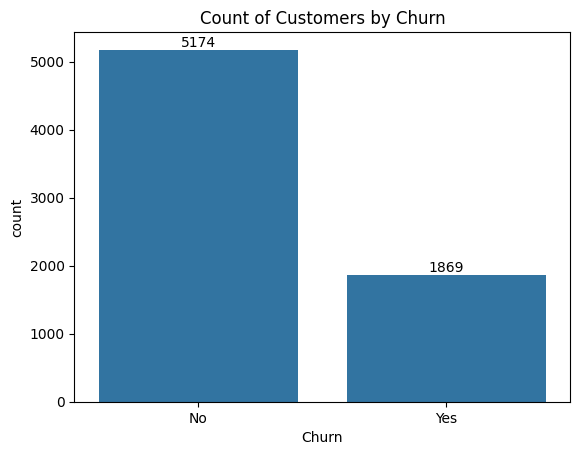

In [14]:
ax = sns.countplot(x = 'Churn', data = df )
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

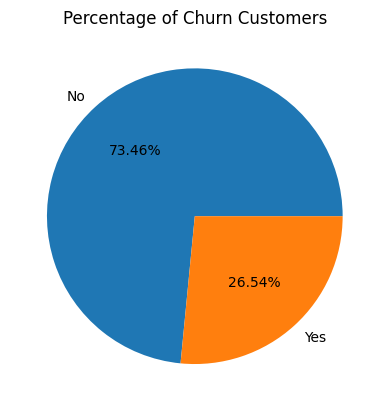

In [15]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churn Customers")
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churned out.
#Now let's explore the reason behind it.

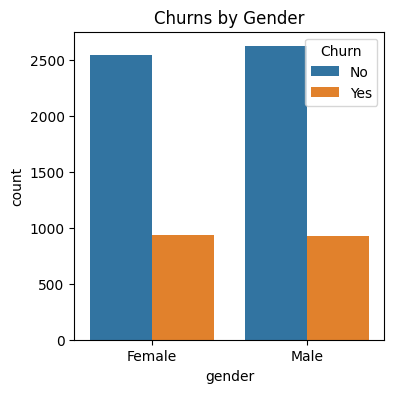

In [16]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churns by Gender")
plt.show()

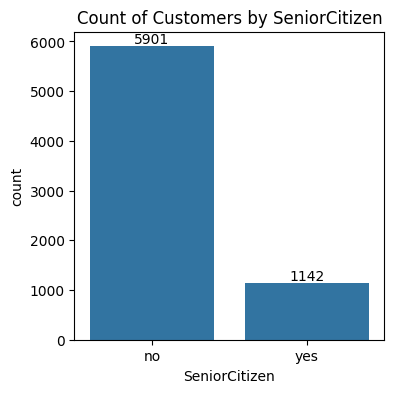

In [17]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

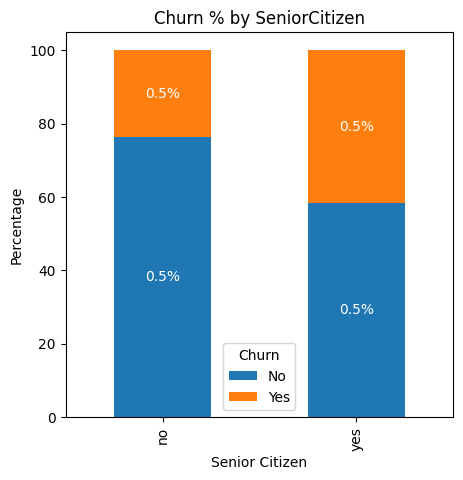

In [18]:
# Cross-tab of SeniorCitizen vs Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart (default colors)
ax = ct.plot(kind='bar', stacked=True, figsize=(5,5))

# Add percentage labels
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # only label non-empty
        x = p.get_x() + width / 2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f"{width:.1f}%", (x, y), ha='center', va='center',
                    fontsize=10, color='white')

plt.title("Churn % by SeniorCitizen")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.show()

#Comparative a greated percentage of people in senior citizen category have churned

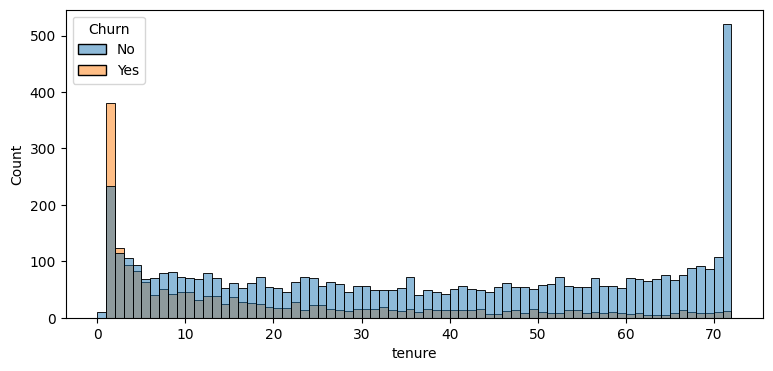

In [22]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

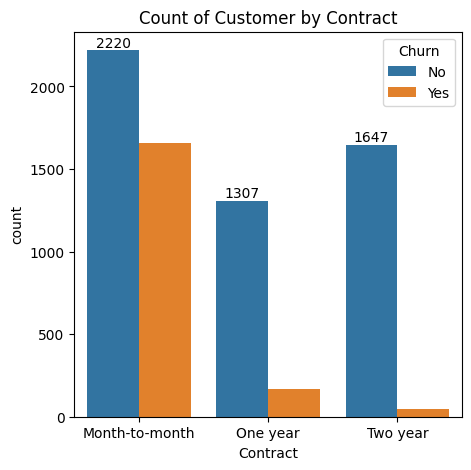

In [26]:
plt.figure(figsize = (5,5))
ax = sns.countplot( x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#PEople who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

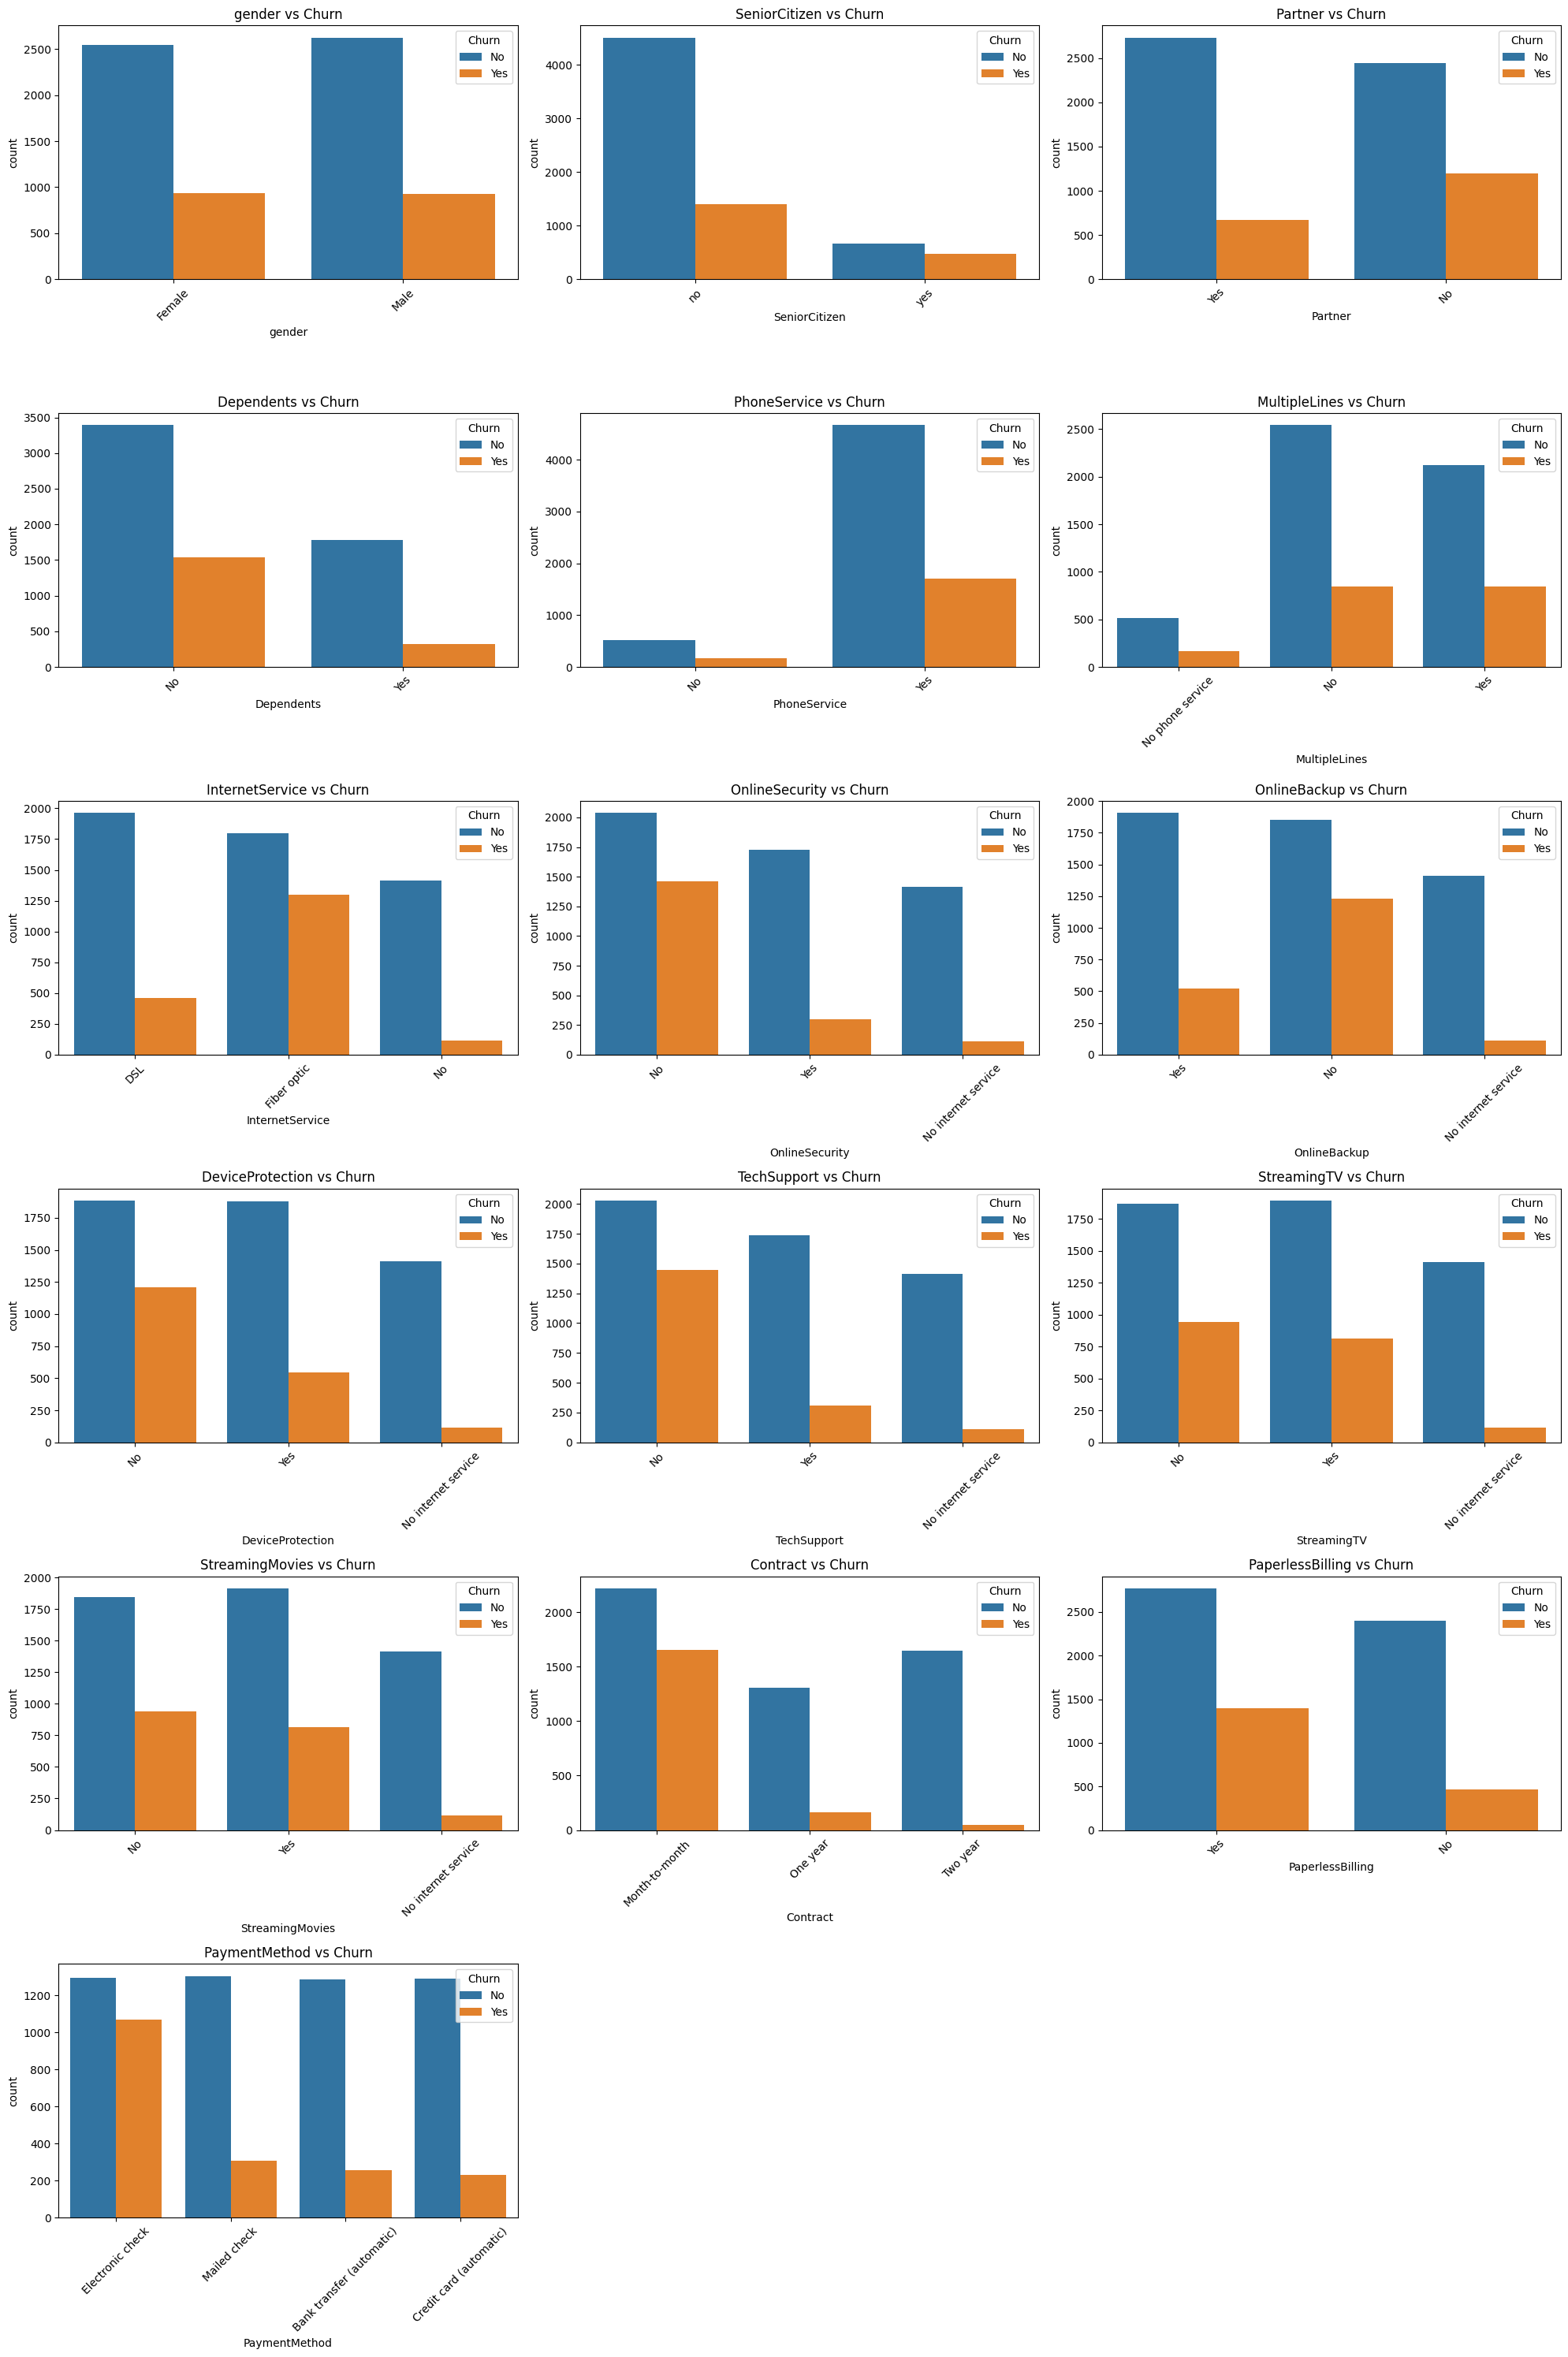

In [40]:
# List of categorical columns (excluding IDs and numeric ones like tenure, charges)
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Set up grid (6 rows × 3 cols = 16 plots)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,30))
axes = axes.flatten()  # flatten so we can loop easily

# Loop through categorical columns
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, hue="Churn", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=45)  # rotate x-labels for readability

# Remove empty subplot if cat_cols < total grid spots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Senior citizens and customers without partners or dependents are more likely to churn, while gender shows little impact.
2. Fiber users churn more than DSL, and lack of value-added services like Tech Support or Security increases churn risk.
3. Month-to-month contracts and paperless billing show the highest churn, while long-term contracts reduce churn significantly.
4. Electronic check payments have the highest churn, while auto-pay via credit card or bank transfer keeps customers more loyal.

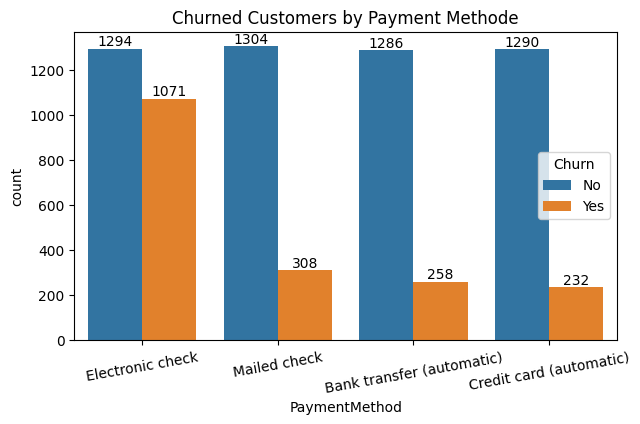

In [53]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Methode")
plt.xticks(rotation = 10)
plt.show()

Customer is likely to churn when he is usning electronic check as a payment method